In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# import the dataset
dataset = pd.read_csv("titanic.csv")
dataset.head()

# The dataset is about titanic incident. We are going to determine whether a person survive or not.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


In [3]:
# Set the targets and features.

X = dataset.drop("Survived", axis=1)
y = dataset.loc[:,"Survived"]

In [4]:
# Split the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

In [6]:
# Train the models
decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Get the predictions
decisiontree_pred = decisiontree.predict(X_test)
randomforest_pred = randomforest.predict(X_test)

In [10]:
# show classification_report to check the performance
print(classification_report(y_test, decisiontree_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.76      0.81      0.79        32

    accuracy                           0.75        55
   macro avg       0.74      0.73      0.73        55
weighted avg       0.74      0.75      0.74        55



In [11]:
# show classification_report to check the performance
print(classification_report(y_test, randomforest_pred))

              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.71      0.78      0.75        32

    accuracy                           0.69        55
   macro avg       0.68      0.67      0.68        55
weighted avg       0.69      0.69      0.69        55



Note: Random Forest Classifier has better scores.

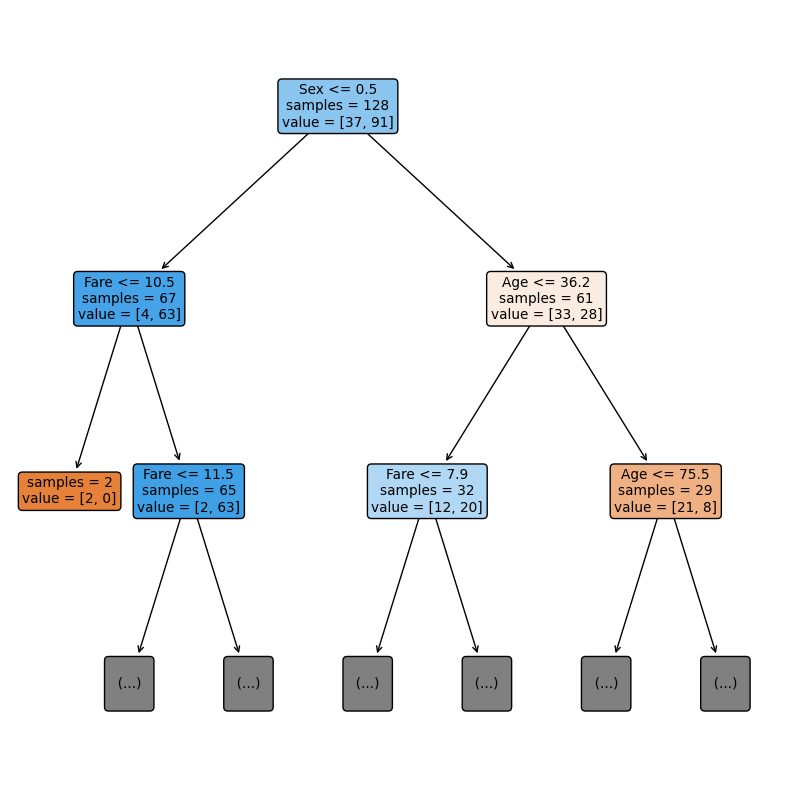

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree
fig = plt.figure(figsize=(10,10))
plot_tree(decisiontree,
          max_depth=2,
          feature_names=X.columns,
          filled=True,
          impurity=False,
          rounded=True,
          precision=1)

plt.show()